<a href="https://colab.research.google.com/github/amolathavale/aiml/blob/master/Diabetes_NN_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Diabetes prediction - feedforward NN

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

In [5]:
df = pd.read_csv('diabetes.csv')

In [9]:
df.head(), df.columns

(   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
 0            6      148             72             35        0  33.6   
 1            1       85             66             29        0  26.6   
 2            8      183             64              0        0  23.3   
 3            1       89             66             23       94  28.1   
 4            0      137             40             35      168  43.1   
 
    DiabetesPedigreeFunction  Age  Outcome  
 0                     0.627   50        1  
 1                     0.351   31        0  
 2                     0.672   32        1  
 3                     0.167   21        0  
 4                     2.288   33        1  ,
 Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
        'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
       dtype='object'))

####Observe data distribution

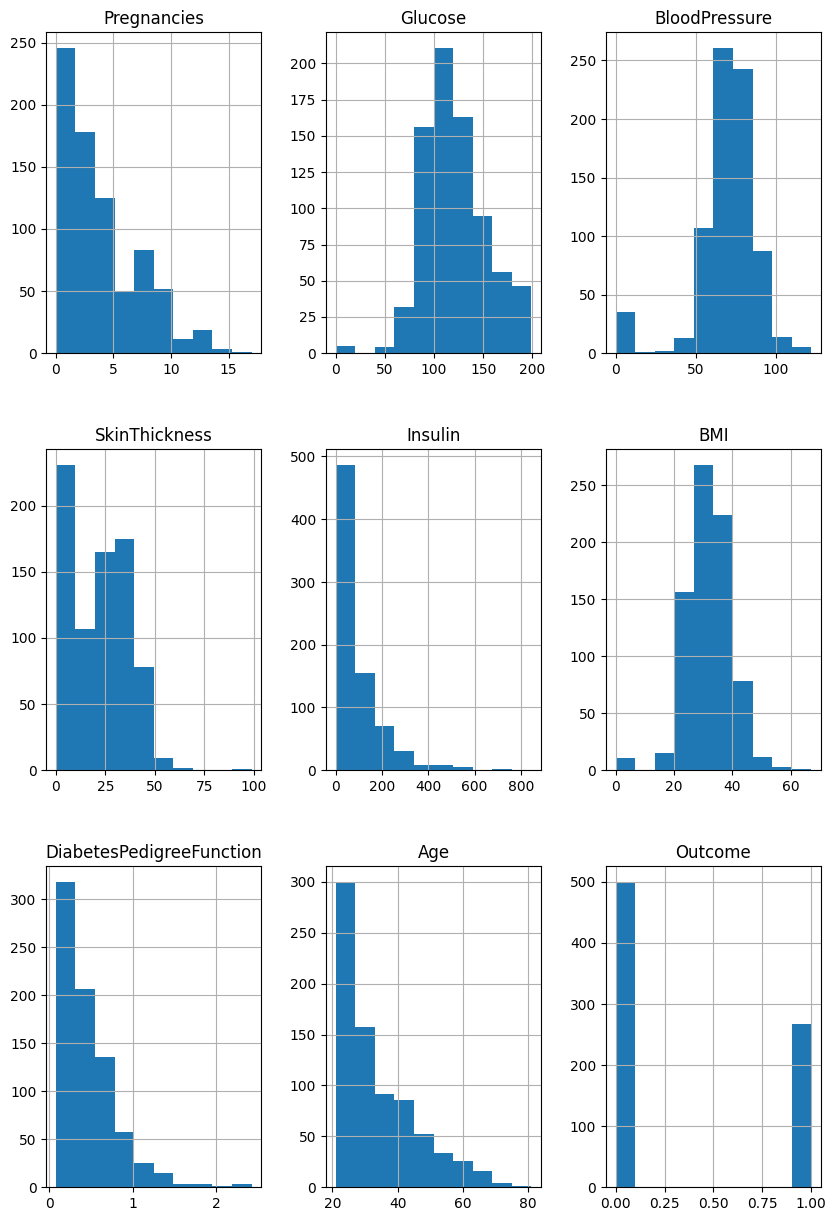

In [12]:
df.hist(layout=(3,3), figsize=(10,15))
plt.show()
#columns have uneven range and non-nromal distribution - may need standardization
#dataset is skewed for label - so needs balancing

In [13]:
# seperate data and labels
X = df[df.columns[:-1]].values
y = df[df.columns[-1]].values
X.shape, y.shape

((768, 8), (768,))

In [15]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

array([[ 0.63994726,  0.84832379,  0.14964075,  0.90726993, -0.69289057,
         0.20401277,  0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575,  0.53090156, -0.69289057,
        -0.68442195, -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, -1.28821221, -0.69289057,
        -1.10325546,  0.60439732, -0.10558415],
       [-0.84488505, -0.99820778, -0.16054575,  0.15453319,  0.12330164,
        -0.49404308, -0.92076261, -1.04154944],
       [-1.14185152,  0.5040552 , -1.50468724,  0.90726993,  0.76583594,
         1.4097456 ,  5.4849091 , -0.0204964 ],
       [ 0.3429808 , -0.15318486,  0.25303625, -1.28821221, -0.69289057,
        -0.81134119, -0.81807858, -0.27575966],
       [-0.25095213, -1.34247638, -0.98770975,  0.71908574,  0.07120427,
        -0.12597727, -0.676133  , -0.61611067],
       [ 1.82781311, -0.184482  , -3.57259724, -1.28821221, -0.69289057,
         0.41977549, -1.02042653, -0.36084741],
       [-0.54791859,  2.38188392

In [16]:
!pip install -U imbalanced-learn

In [17]:
from imblearn.over_sampling import RandomOverSampler

X, y = RandomOverSampler().fit_resample(X, y)
data = np.hstack((X, np.reshape(y, (-1, 1))))

trans_df = pd.DataFrame(data, columns = df.columns)

In [21]:
#Check if the standardization, over sampling transforations worked OK
trans_df.shape, len(trans_df[trans_df["Outcome"]==1]), len(trans_df[trans_df["Outcome"]==0])

((1000, 9), 500, 500)

In [52]:
#Prepare train, validation and test data
from sklearn.model_selection import train_test_split

X_train, X_tmp, y_train, y_tmp = train_test_split(X, y, test_size=0.4, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_tmp, y_tmp, test_size=0.5, random_state=0)

In [53]:
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((600, 8), (200, 8), (200, 8), (600,), (200,), (200,))

In [54]:
#Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


In [55]:
model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.001),
              loss= tf.keras.losses.BinaryFocalCrossentropy(),
              metrics = ['accuracy'])

In [56]:
#pre training metrics
model.evaluate(X_train, y_train)
model.evaluate(X_val, y_val)

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5212 - loss: 0.2912  
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4426 - loss: 0.3467 


[0.3266736567020416, 0.4650000035762787]

In [57]:
#Train the model
model.fit(X_train, y_train, batch_size=20, epochs=25, validation_data=(X_val, y_val))

Epoch 1/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4792 - loss: 0.2824 - val_accuracy: 0.5450 - val_loss: 0.2099
Epoch 2/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6273 - loss: 0.1809 - val_accuracy: 0.6600 - val_loss: 0.1639
Epoch 3/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6465 - loss: 0.1618 - val_accuracy: 0.7050 - val_loss: 0.1470
Epoch 4/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6646 - loss: 0.1510 - val_accuracy: 0.7250 - val_loss: 0.1392
Epoch 5/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6830 - loss: 0.1476 - val_accuracy: 0.7250 - val_loss: 0.1350
Epoch 6/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7164 - loss: 0.1418 - val_accuracy: 0.7300 - val_loss: 0.1316
Epoch 7/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7167 - loss: 0.1414 - val_accuracy: 0.7450 - val_loss: 0.1297
Epoch 8/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7174 - loss: 0.1394 - val_accuracy: 0.7350 - val_loss:

In [58]:
#test the model
model.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7876 - loss: 0.1222 


[0.12809959053993225, 0.7649999856948853]